<a href="https://colab.research.google.com/github/Yuya122815/Prog2kakushin/blob/main/work3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


以下のプログラムはマルバツゲームができるプログラムです。

マルバツゲームを開始します
マルの番です
1から3の整数を入力してください
上から何番目?:3
左から何番目?:2


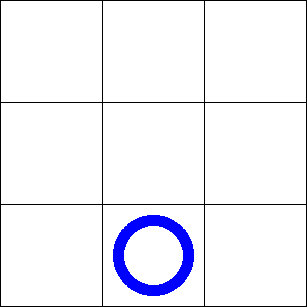

バツの番です
1から3の整数を入力してください
上から何番目?:3
左から何番目?:3


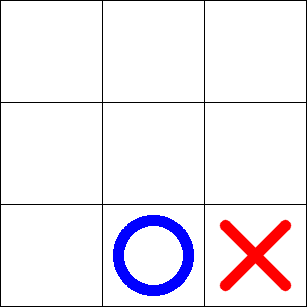

マルの番です
1から3の整数を入力してください
上から何番目?:1
左から何番目?:1


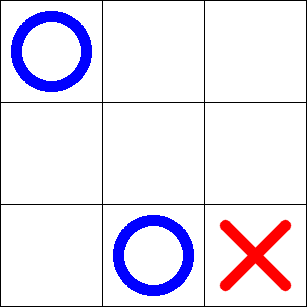

バツの番です
1から3の整数を入力してください
上から何番目?:2
左から何番目?:3


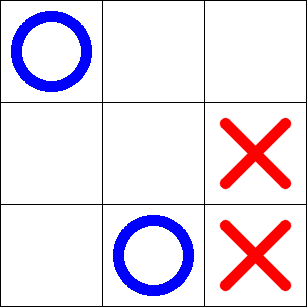

マルの番です
1から3の整数を入力してください
上から何番目?:2
左から何番目?:2


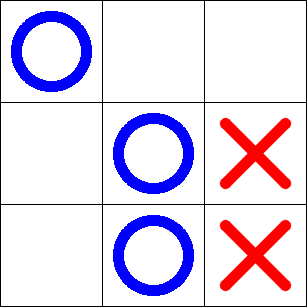

バツの番です
1から3の整数を入力してください
上から何番目?:1
左から何番目?:3


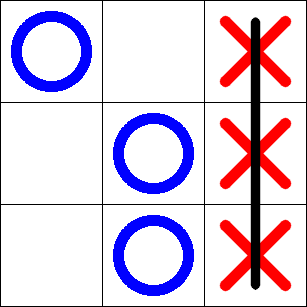

バツの勝ち!!


In [61]:
import numpy as np
import cv2, sys
from google.colab.patches import cv2_imshow
import numpy as np

def maru(i,j,img):
  cv2.circle(img, (51+102*j, 51+102*i), 35, (255, 0, 0), thickness=10)

def batu(i,j,img):
  cv2.line(img, (21+102*j, 21+102*i), (81+102*j, 81+102*i), (0, 0, 255), thickness=10, lineType=cv2.LINE_AA)
  cv2.line(img, (81+102*j, 21+102*i), (21+102*j, 81+102*i), (0, 0, 255), thickness=10, lineType=cv2.LINE_AA)

print("マルバツゲームを開始します")
img = np.zeros( (307, 307, 3), np.uint8 )
img.fill( 255 )
for i in range(4):
  cv2.line(img, (0, 102*i), (306, 102*i), color=(0,0,0), thickness=1)
  cv2.line(img, (102*i, 0), (102*i, 306), color=(0,0,0), thickness=1)

t=0
a=np.zeros((3,3))

while True:
  i=0
  j=0
  t+=1
  b=0
  if t%2==1:
    print("マルの番です")
  else:
    print("バツの番です")

  while True:
    print("1から3の整数を入力してください")
    i=int(input("上から何番目?:"))
    if i>=1 and i<=3:
      break
  while True:
    j=int(input("左から何番目?:"))
    if j>=1 and j<=3:
      break
    print("1から3の整数を入力してください")

  if a[i-1,j-1]==1:
    print("そこはマルで埋まっています\nやり直してください")
    t-=1
    continue
  if a[i-1,j-1]==2:
    print("そこはバツで埋まっています\nやり直してください")
    t-=1
    continue

  if t%2==1:
    maru(i-1,j-1,img)
    a[i-1,j-1]=1
  else:
    batu(i-1,j-1,img)
    a[i-1,j-1]=2

  for n in range(3):
    sum1=1
    sum2=1
    sum3=1
    sum4=1
    for m in range(3):
      sum1*=a[n,m]
      sum2*=a[m,n]
      sum3*=a[m,m]
      sum4*=a[m,2-m]
    if sum1==1:
      b=1
      cv2.line(img, (21,51+102*n), (285,51+102*n), (0, 0, 0), thickness=7, lineType=cv2.LINE_AA)
    if sum1==8:
      b=2
      cv2.line(img, (21,51+102*n), (285,51+102*n), (0, 0, 0), thickness=7, lineType=cv2.LINE_AA)
    if sum2==1:
      b=1
      cv2.line(img, (51+102*n,21), (51+102*n,285), (0, 0, 0), thickness=7, lineType=cv2.LINE_AA)
    if sum2==8:
      b=2
      cv2.line(img, (51+102*n,21), (51+102*n,285), (0, 0, 0), thickness=7, lineType=cv2.LINE_AA)
    if sum3==1:
      b=1
      cv2.line(img, (21,21), (285,285), (0, 0, 0), thickness=7, lineType=cv2.LINE_AA)
    if sum3==8:
      b=2
      cv2.line(img, (21,21), (285,285), (0, 0, 0), thickness=7, lineType=cv2.LINE_AA)
    if sum4==1:
      b=1
      cv2.line(img, (285,21), (21,285), (0, 0, 0), thickness=7, lineType=cv2.LINE_AA)
    if sum4==8:
      b=2
      cv2.line(img, (285,21), (21,285), (0, 0, 0), thickness=7, lineType=cv2.LINE_AA)

  cv2_imshow(img)

  if b==1:
    print("マルの勝ち!!")
    break
  if b==2:
    print("バツの勝ち!!")
    break
  if t==9:
    print("引き分け")
    break